In [ ]:
#| hide
import pandas as pd
import plotly.io as pio
from betting_env.config.mongo import mongo_init
from betting_env.datastructure.fixtures import *
from betting_env.betting_env import BettingEnv
from PIL import Image
from IPython.display import display, HTML

In [ ]:
#| hide

# If you use jupyter lab.
pio.renderers.default = "iframe"

# betting_env

> Create a custom GYM environment to simulate trading strategy.

## Install

```sh
pip install betting_env
```

## Test environment

Assuming We have `$N` (N>0) in our Bank account and would want to place some bets on several `football` games.

The `bettor` can play on two alternative betting forms: `1X2` and `Asian handicap` by placing a `small`, `medium`, or `big` stake size of his current balance on `home team win`, `away team win`, or `draw` (1X2 case). In this custom environment, the `agent` is placing ,in each step, a wager on a `single game`, is informed of the `game` information, and receives a `reward` (Profit) that might be `positive` or `negative`.

It should be noted that the `agent` quits betting after he has played all of the supplied `games` or has lost all of the `money`. 

### Load games

In [ ]:
# Initialise connections.
mongo_init("prod_atlas")
# Get all fixtures.
fixtures = Fixture.get_all_fixtures()
# Fixtures.
fixtures = pd.DataFrame(fixtures.as_pymongo())

### Init environment

In [ ]:
env = BettingEnv(fixtures)
max_steps_limit = fixtures.shape[0]

### Playing random choices

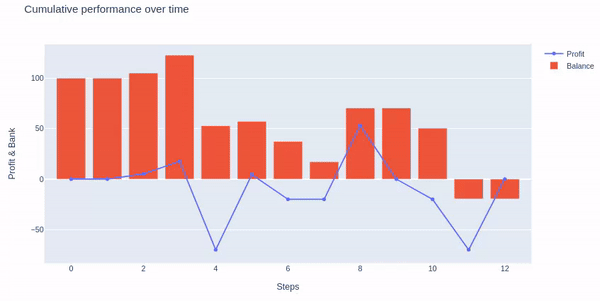

In [ ]:
# Init RL env.
env.reset()
# Init done Flag to False.
done = False
# Init loop counter.
i = 0
# Stops when it is done or when we have bet on all provided games.
while not done and i < max_steps_limit:
    # Make a step.
    obs, reward, done, info = env.step(env.action_space.sample())
    # Increment counter.
    i = i + 1
# Display graph.
env.render()
env.fig.update_layout(hovermode="x")
figure = Image.open("../images/img_1.gif")
display(figure)
#figure = env.fig.to_image(format="png")
#Image(figure)

In [ ]:
HTML('<img src="../images/img_1.gif">')

In [ ]:
HTML('<img src="./images/img_1.gif">')

### Playing Medium Stake on Home Team Win (1X2)

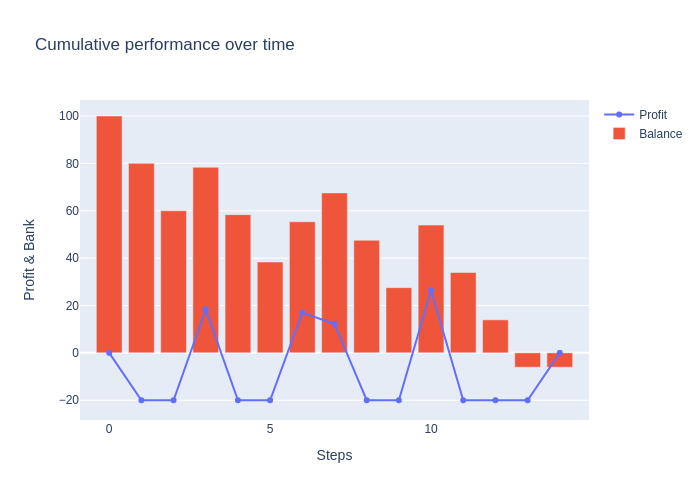

In [ ]:
# Init RL env.
env.reset()
# Init done Flag to False.
done = False
# Init loop counter.
i = 0
# Stops when it is done or when we have bet on all provided games.
while not done and i < max_steps_limit:
    # Make a step.
    obs, reward, done, info = env.step(2)
    # Increment counter.
    i = i + 1
# Display graph.
env.render()
env.fig.update_layout(hovermode="x")
figure = env.fig.to_image(format="png")
#Image(figure)